# 가위바위보 분류기  
  
  
  
- 직접 촬영한 가위, 바위, 보 사진을 촬영
- 모델을 만들어서 학습을 한다.
- 학습된 모델을 평가 한다.

## 1. Import Module

In [3]:
from PIL import Image
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

print(keras.__version__)

2.5.0


## 2. Data Preprocessing

- 가위바위보 사진 각각 300장을 준비한다.
- 가위바위보 사진을 28 x 28 x 3으로 reshape한다
- 각각의 데이터에 label을 붙임
- nomlization을 한다.

### 2-1 Image resize

In [12]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)        
        new_img.save(img, "JPEG")
    
    print(f"{len(images)}images resized.")

In [13]:
rock_image_dir_path = "./train/rock"
scissor_image_dir_path = "./train/scissor"
paper_image_dir_path = "./train/paper"

resize_images(rock_image_dir_path)
resize_images(scissor_image_dir_path)
resize_images(paper_image_dir_path)

rock_image_dir_path = "./test/rock"
scissor_image_dir_path = "./test/scissor"
paper_image_dir_path = "./test/paper"

resize_images(rock_image_dir_path)
resize_images(scissor_image_dir_path)
resize_images(paper_image_dir_path)

300  images to be resized.
300images resized.
300  images to be resized.
300images resized.
300  images to be resized.
300images resized.
100  images to be resized.
100images resized.
100  images to be resized.
100images resized.
100  images to be resized.
100images resized.


### 2-2 Load Image

In [14]:
def load_data(img_path, number_of_data=900):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx = 0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)        
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1
    
    for file in glob.iglob(img_path+'/rock/*.jpg'):        
        img = np.array(Image.open(file),dtype=np.int32)
        
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1      
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)        
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print(f"데이터 X의 이미지 개수는"{idx}"입니다.")
    return imgs, labels

SyntaxError: invalid syntax (<ipython-input-14-b3b37d8cf9fc>, line 28)

In [11]:
image_dir_path = "./train/"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

image_dir_path = "./test/"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print(f"x_train shape: {format(x_train.shape)}")
print(f"y_train shape: {format(y_train.shape)}")

print(f"x_test shape: {format(x_test.shape)}")
print(f"y_test shape: {format(y_test.shape)}")

데이터 X의 이미지 개수는 900 입니다.
데이터 X의 이미지 개수는 300 입니다.
x_train shape: (900, 28, 28, 3)
y_train shape: (900,)
x_test shape: (900, 28, 28, 3)
y_test shape: (900,)


라벨: 0


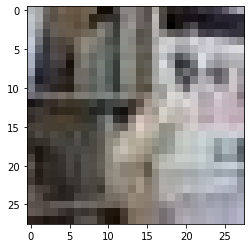

In [15]:
plt.imshow(x_train[0])
print(f'라벨: {y_train[0]}')

## 3.Modeling
- keras를 활용하여 간단한 CNN 기반 분류기 모델을 정의
- 채널수는 각각 64,64,64개를 가짐
- 최종적으로 분류 개수는 3으로 해야하지만 5로 할때 더 높은 성능을 나타냄
- epoch수는 10으로 지정


In [16]:
n_channel_1=64
n_channel_2=64
n_channel_3=64
n_dense=64
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(5, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

## 4. Training
- optimizer : adam 
- loss function : sparse_categorical_crossentropy 

In [17]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train,epochs=n_train_epoch)

Epoch 1/10
29/29 [==============================] - 1s 12ms/step - loss: 0.8326 - accuracy: 0.8244
Epoch 2/10
29/29 [==============================] - 0s 12ms/step - loss: 0.0881 - accuracy: 0.9756
Epoch 3/10
29/29 [==============================] - 0s 12ms/step - loss: 0.0510 - accuracy: 0.9900
Epoch 4/10
29/29 [==============================] - 0s 12ms/step - loss: 0.0354 - accuracy: 0.9911
Epoch 5/10
29/29 [==============================] - 0s 12ms/step - loss: 0.0282 - accuracy: 0.9922
Epoch 6/10
29/29 [==============================] - 0s 12ms/step - loss: 0.0520 - accuracy: 0.9822
Epoch 7/10
29/29 [==============================] - 0s 12ms/step - loss: 0.0836 - accuracy: 0.9711
Epoch 8/10
29/29 [==============================] - 0s 12ms/step - loss: 0.0315 - accuracy: 0.9922
Epoch 9/10
29/29 [==============================] - 0s 12ms/step - loss: 0.0332 - accuracy: 0.9878
Epoch 10/10
29/29 [==============================] - 0s 12ms/step - loss: 0.0248 - accuracy: 0.9956


## 5. Evaluation

- 약 81%의 정확도를 나타낸다.
- 내부 구조나 다양한 최적화 기법을 사용하면 더 정확해 질것으로 생각된다.

In [19]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

29/29 - 0s - loss: 1.8518 - accuracy: 0.8189
